# Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and Process Data

In [23]:
df=pd.read_csv('PCA_practice_dataset.csv')#Load dataset
X=df.to_numpy()#Converting data to numpy
X.shape

(8041, 35)

In [24]:
#Scaling the data with mean=0 and standard deviation=1
scaler=StandardScaler()
X=scaler.fit_transform(X)

# PCA 

In [25]:
#Apply PCA
pca=PCA()
X=pca.fit_transform(X)

#Sum of eigen values for corresponding eigen vectors
cum_variance=np.cumsum(pca.explained_variance_ratio_)*100

#Declare a list of thresholds
thresholds=[i for i in range(90,97+1,1)]

#list of components required to retain the variance as in list thresholds
components=[np.argmax(cum_variance>threshold) for threshold in thresholds]

for component,threshold in zip(components,thresholds):
    print("Components required for {}% threshold are: {}".format(threshold,component))

Components required for 90% threshold are: 2
Components required for 91% threshold are: 2
Components required for 92% threshold are: 3
Components required for 93% threshold are: 3
Components required for 94% threshold are: 4
Components required for 95% threshold are: 4
Components required for 96% threshold are: 5
Components required for 97% threshold are: 6


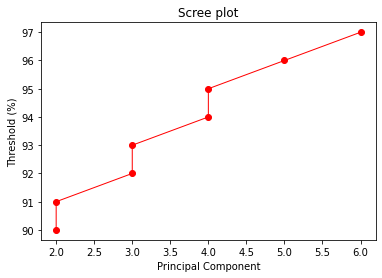

In [28]:
#Plot a Scree plot
plt.plot(components,range(90,97+1,1),'ro-',linewidth=1)
plt.title('Scree plot')
plt.xlabel('Principal Component')
plt.ylabel('Threshold (%)')
plt.show()

In [30]:
#Dimensionality Reduction
X_orig=X

for component,var in zip(components,thresholds):
    pca=PCA(n_components=component)
    X_transformed=pca.fit_transform(X_orig)
    print("Performance dimensionality reduction to retain {}% threshold: ".format(var))
    print("After dimensionality reduction, new shape of the dataset is: ",X_transformed.shape)
    print('\n')

Performance dimensionality reduction to retain 90% threshold: 
After dimensionality reduction, new shape of the dataset is:  (8041, 2)


Performance dimensionality reduction to retain 91% threshold: 
After dimensionality reduction, new shape of the dataset is:  (8041, 2)


Performance dimensionality reduction to retain 92% threshold: 
After dimensionality reduction, new shape of the dataset is:  (8041, 3)


Performance dimensionality reduction to retain 93% threshold: 
After dimensionality reduction, new shape of the dataset is:  (8041, 3)


Performance dimensionality reduction to retain 94% threshold: 
After dimensionality reduction, new shape of the dataset is:  (8041, 4)


Performance dimensionality reduction to retain 95% threshold: 
After dimensionality reduction, new shape of the dataset is:  (8041, 4)


Performance dimensionality reduction to retain 96% threshold: 
After dimensionality reduction, new shape of the dataset is:  (8041, 5)


Performance dimensionality reduction to r